<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2007%20-%20CNN%20Implementation/Lecture_07_CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2, glob
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.models import Model
from sklearn import metrics

#To ensure reproducibility
#we set the random seed
seed_number = 42
tf.random.set_seed(seed_number)
np.random.seed(seed_number)


In [ ]:
#Auxiliary Function to plot side by side
#@Author: Prof. André Hochuli
#Visualiza um lista de figuras lado a lado, facilitando a comparação qualitativa
def plot_sidebyside(img_list,titles=None,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)

  if titles is None:
    titles = []
    A = ord('A')
    for i in range(n):
      titles.append(chr(A+i))

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()

In [ ]:
#@Author: Prof. André Hochuli
#Compila os resultados para analises qualitativas e quantitativas
def performance_evaluation(x_test, y_test, predictions, class_names, info_message):

    print(f"Evaluation of {info_message}")
    print(metrics.classification_report(y_test, predictions))


    # Matriz de confusão
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()

    # Imagens classificadas corretamente
    correct_idx = np.where(y_test == predictions)[0]
    n_correct = min(10, len(correct_idx))
    if n_correct > 0:
        plt.figure(figsize=(22, 4))
        for i in range(n_correct):
            idx = correct_idx[i]
            plt.subplot(1, n_correct, i+1)
            plt.imshow(x_test[idx], cmap='gray', interpolation='nearest')
            plt.axis('off')
            plt.title(f"Lbl:{y_test[idx]} Pred:{predictions[idx]}")
        plt.suptitle("Correct Predictions", fontsize=16, fontweight='bold', color='white', backgroundcolor='green')
        plt.show()

    #Imagens classificadas incorretamente
    wrong_idx = np.where(y_test != predictions)[0]
    n_wrong = min(10, len(wrong_idx))
    if n_wrong > 0:
        plt.figure(figsize=(22, 4))
        for i in range(n_wrong):
            idx = wrong_idx[i]
            plt.subplot(1, n_wrong, i+1)
            plt.imshow(x_test[idx], cmap='gray', interpolation='nearest')
            plt.axis('off')
            plt.title(f"Lbl:{y_test[idx]} Pred:{predictions[idx]}")
        plt.suptitle("Wrong Predictions", fontsize=16, fontweight='bold', color='white', backgroundcolor='red')
        plt.show()


    #Exibir exemplo de cada classe
    unique_classes = np.unique(y_test)
    plt.figure(figsize=(22, 4))
    for i, cls in enumerate(unique_classes):
        idx = np.where(y_test == cls)[0][0]  # primeiro índice da classe
        plt.subplot(1, len(unique_classes), i+1)
        plt.imshow(x_test[idx], cmap='gray', interpolation='nearest')
        plt.axis('off')
        plt.title(f"{i}-{class_names[cls]}")
    plt.suptitle("Example of each class", fontsize=16, fontweight='bold', color='black', backgroundcolor='yellow')
    plt.show()


In [ ]:
#Plot dataset samples
def plot_dataset(ds, lbls_name):
  N_SAMPLES = 10
  for i in range(5):
    for x,y in ds.take(1):

      x = x.numpy()
      x = np.squeeze(x)
      y = y.numpy()
      plot_sidebyside(x[:N_SAMPLES],
                      y[:N_SAMPLES],'gray')

#Plot a training history
def plot_history(history):
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


# Datasets (from scratch)

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
!wget $dataset_url -O flower_photos.tgz


In [ ]:
!tar -xzf flower_photos.tgz
!ls flower_photos/

image_count = len(list(glob.glob('flower_photos/*/*.jpg')))
print(f'The dataset has {image_count} images')

#Holdout

#Tensorflow Dataset Pipeline

#Dataset Visualization

#CNN From Scratch

##The Convolutional Layers
  As stated in the last class, a cnn model enqueue several convolutional layers. This step is called 'feature extraction'. In the end of this structure, the resulting matrix is a feature map with dense representations

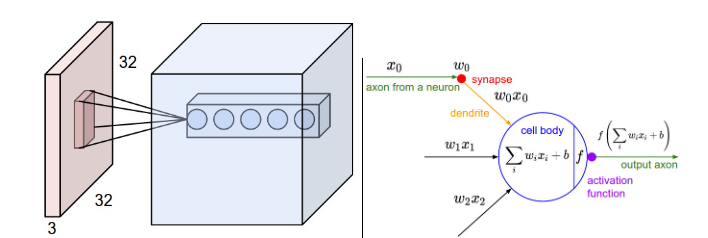


Additional Reference: https://cs231n.github.io/convolutional-networks/

##The Pooling Layers

After convolutional layers, a CNN `typically` includes pooling layers. This step is called dimensionality reduction or downsampling. Pooling layers summarize the information in local regions of the feature map, reducing its spatial size while retaining the most important features. This helps the model become more translation-invariant and reduces computational cost.

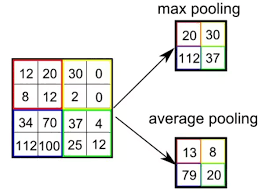

To better illustrate, let’s visualize the following CNN architecture:

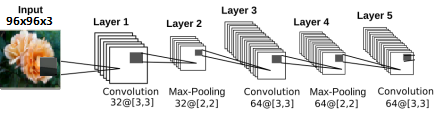

The respective implementation follows:




#The Fully Connected Layer
  The fully connected layer (FC) is a dense layer that receives a 1D tensor. It will provide predictions and probabilities. This is the classification step in the pipeline and can be replaced for another model. (SVM, etc.)

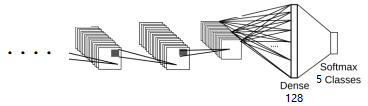

The last layer is a softmax activation

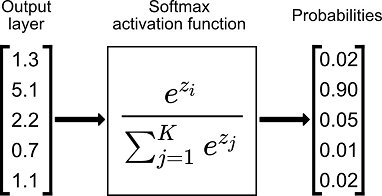

#Training

#Evaluation

#Overfitting

Overfitting occurs when a model captures noise or specific patterns in the training data, impairing its ability to generalize to unseen data. Strategies such as regularization, dropout, data augmentation, and transfer learning help mitigate this by controlling model complexity and leveraging pre-learned features.

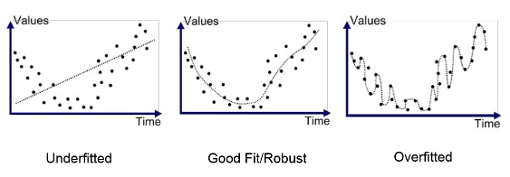

##Data augmentation

Data augmentation is a technique that artificially increases the size and diversity of a dataset by applying transformations such as rotation, flipping, cropping, or color adjustments. It helps improve model generalization, reduces overfitting, and is especially useful when training data is limited.

##Dropout

Dropout is a regularization technique that randomly deactivates a fraction of neurons during training, forcing the model to learn redundant representations and reducing overfitting.

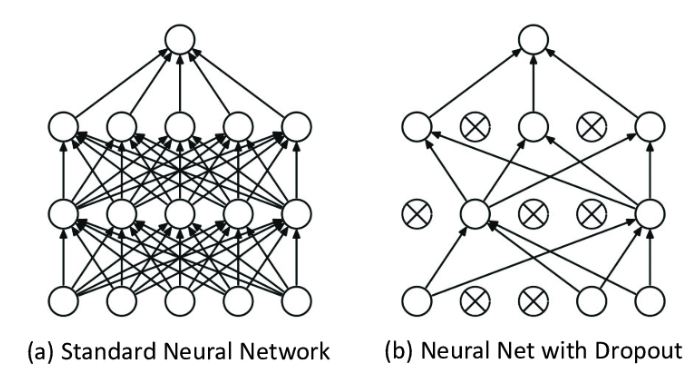

#Save and Load Weights

Save and load weights allows storing a model’s learned parameters to disk and reloading them later. This enables resuming training, sharing models, or deploying them without retraining, ensuring reproducibility and efficiency.

#Resuming Training

#Checkpoints and EalyStopping

Checkpoints save a model’s weights during training, typically at the end of each epoch or when performance improves, allowing recovery in case of interruptions and ensuring the best model is retained.

Early stopping monitors a validation metric and halts training when improvement stops, preventing overfitting by avoiding unnecessary epochs. Together, they help maintain model performance and stability.

#Transfer-Learning

Transfer learning is a technique where a model pre-trained on a large dataset is adapted to a new task, often with less data. By leveraging previously learned features, it reduces training time, improves performance, and helps prevent overfitting on smaller datasets.

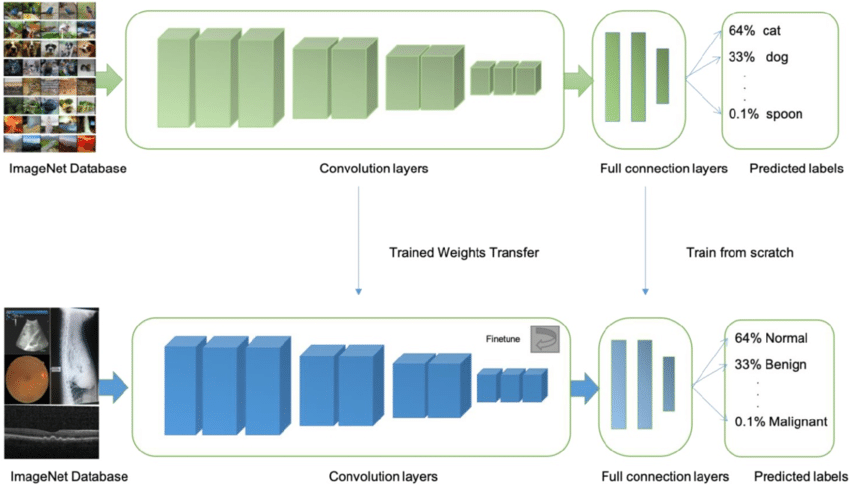